<h2 align='center' style='color:blue'>Exercise: Outlier Detection and Removal Using IQR</h2>

You are given height_weight.csv file which contains heights and weights of 1000 people. Dataset is taken from here,
https://www.kaggle.com/mustafaali96/weight-height

You need to do this,

(1) Load this csv in pandas dataframe and first plot histograms for height and weight parameters

(2) Using IQR detect weight outliers and print them

(3) Using IQR, detect height outliers and print them

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("height_weight.csv")
data.head()

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


**Histgram for weights**

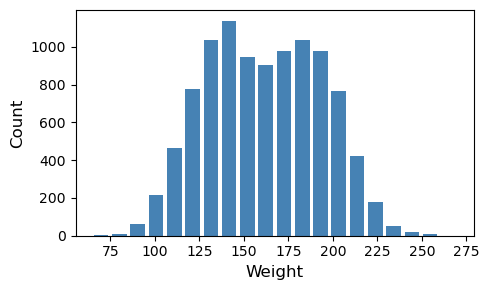

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 3))  
plt.hist(data['weight'], bins=20, color='steelblue', rwidth=0.8)  
plt.xlabel('Weight', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  
plt.show()


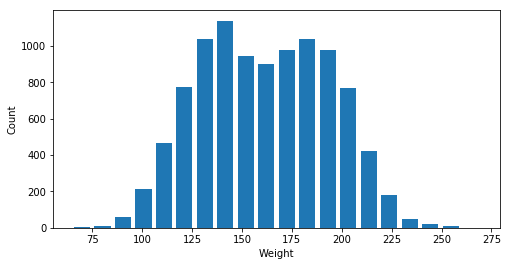

**Histgram for heights**

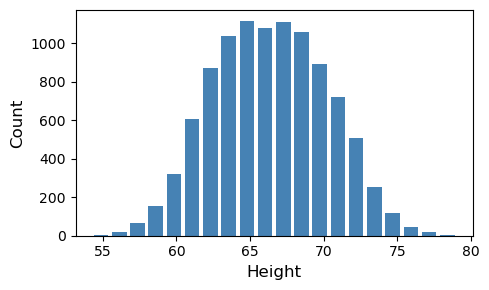

In [30]:
plt.figure(figsize=(5, 3)) 
plt.hist(data['height'], bins=20, color='steelblue', rwidth=0.8) 
plt.xlabel('Height', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  
plt.show()

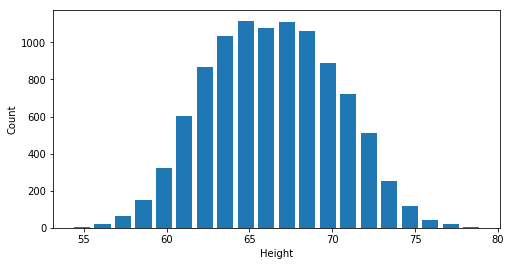

**Detect outliers based on weight, Q1, Q3**

In [18]:
Q1 = data['weight'].quantile(0.25)
Q3 = data['weight'].quantile(0.75)
Q1

135.8180513055015

In [19]:
Q3

187.16952486868348

(135.8180513055015, 187.16952486868348)

### IQR

In [21]:
IQR = Q3 - Q1
IQR

51.35147356318197

51.35147356318197

### Upperlimit, lowerlimit

In [22]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

lower_limit

58.79084096072856

In [23]:
upper_limit

264.19673521345646

(58.79084096072856, 264.19673521345646)

### Find the outlier records

In [24]:
outliers = data[(data['weight'] < lower_limit) | (data['weight'] > upper_limit)]
outliers

,gender,height,weight
2014,Male,78.998742,269.989699


,gender,height,weight
2014,Male,78.998742,269.989699


**Find the no outlier records**

In [25]:
non_outliers = data[(data['weight'] >= lower_limit) & (data['weight'] <= upper_limit)]
non_outliers

,gender,height,weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
